In [25]:
from sklearn.datasets import load_boston, load_breast_cancer, load_iris, fetch_lfw_people

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import losses
from sklearn.pipeline import Pipeline

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt 
%matplotlib inline

### Load training data

Load `train.csv` from Kaggle into a pandas DataFrame.

In [26]:
df = pd.read_csv('train.csv')

In [27]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df['label'].head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

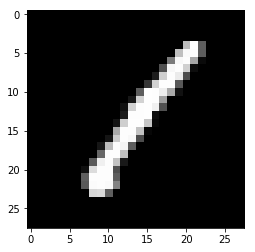

In [29]:
plt.imshow(df.iloc[0, 1:].values.reshape(28,28), cmap=plt.cm.gray)

In [30]:
y = to_categorical(df['label'].values)

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]].values, y)

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [61]:
model = Sequential()
model.add(Conv2D(15, kernel_size=(5,5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(30, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(45, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Train on 31500 samples, validate on 10500 samples
Epoch 1/30
31500/31500 [==============================] - 18s 563us/step - loss: 0.3288 - acc: 0.9003 - val_loss: 0.1234 - val_acc: 0.9607
Epoch 2/30
31500/31500 [==============================] - 16s 500us/step - loss: 0.1025 - acc: 0.9684 - val_loss: 0.0839 - val_acc: 0.9746
Epoch 3/30
31500/31500 [==============================] - 16s 494us/step - loss: 0.0695 - acc: 0.9783 - val_loss: 0.0799 - val_acc: 0.9755
Epoch 4/30
31500/31500 [==============================] - 15s 479us/step - loss: 0.0562 - acc: 0.9822 - val_loss: 0.0638 - val_acc: 0.9798
Epoch 5/30
31500/31500 [==============================] - 15s 482us/step - loss: 0.0433 - acc: 0.9863 - val_loss: 0.0707 - val_acc: 0.9775
Epoch 6/30
31500/31500 [==============================] - 15s 476us/step - loss: 0.0351 - acc: 0.9887 - val_loss: 0.0591 - val_acc: 0.9818
Epoch 7/30
31500/31500 [==============================] - 15s 476us/step - loss: 0.0302 - acc: 0.9904 - val_loss: 0.

In [69]:
test = pd.read_csv('test.csv')

In [70]:
X = test.values

In [71]:
X = X/255.

In [72]:
X = X.reshape(X.shape[0], 28, 28, 1)

In [73]:
pred = model.predict_classes(X)

In [74]:
Label = pred

In [75]:
pd.DataFrame({"ImageId": list(range(1,len(Label)+1)), "Label": Label}).to_csv('predictions_new.csv', \
                                                                              index=False, header=True)